# Alpha Calculation And W+jet Signal Shape

1. Calculate alpha using MC only
    1. Ratio of signal to side-band region
1. Get 1-sigma up/down alpha shape
1. Grab corrected W+jet shape and normalization in side-band region from background estimation code.
1. Using alpha get the W+jet shape and normalization in signal region

In [1]:
import ROOT as r

# To surpress unwanted messages
msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

Welcome to JupyROOT 6.08/05


In [2]:
#fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_AlphaRatioBkgEst_2018_03_27_02h28/HaddedFiles/Hadds_for_BkgEstimation/WWTree_WJets.root")

fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VJets.root")


treeIn = fin.Get("otree")

# Define the cuts
cutString_Lower_SideBand =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so_corr>40)&&(PuppiAK8_jet_mass_so_corr<65))) && (mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_SideBand       =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so_corr>40)&&(PuppiAK8_jet_mass_so_corr<65)) || ((PuppiAK8_jet_mass_so_corr>105)&&(PuppiAK8_jet_mass_so_corr<150))) && (mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_Signal         =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((PuppiAK8_jet_mass_so_corr>65) &&(PuppiAK8_jet_mass_so_corr<105)) && (mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

### Get W+jet histogram in signal, lower side-band and in whole side-band (low as well as high) region

In [3]:
leg = r.TLegend(0.40,0.9,.9,0.7)

hSignal = r.TH1D("hSignal","",38,600,2500)
hSignal.SetMarkerColor(1)
hSignal.SetLineColor(1)
hSignal.SetLineWidth(3)
hSignal.SetMarkerSize(5)
leg.AddEntry(hSignal,"signal region (MC)")

hSignal_4bin = r.TH1D("hSignal_4bin","",38,600,2500)
hSignal_4bin.SetMarkerColor(1)
hSignal_4bin.SetLineColor(1)
hSignal_4bin.SetLineWidth(3)
hSignal_4bin.SetMarkerSize(5)
leg.AddEntry(hSignal_4bin,"signal region (MC)")


hSideBand = r.TH1D("hSideBand","",38,600,2500)
hSideBand.SetMarkerColor(2)
hSideBand.SetLineColor(2)
hSideBand.SetLineWidth(3)
hSideBand.SetMarkerSize(5)
leg.AddEntry(hSideBand,"SideBand Region (MC)")


hLowerSideBand = r.TH1D("hLowerSideBand","",38,600,2500)
hLowerSideBand.SetMarkerColor(3)
hLowerSideBand.SetLineColor(3)
hLowerSideBand.SetLineWidth(3)
hLowerSideBand.SetMarkerSize(5)
leg.AddEntry(hLowerSideBand,"Lower SideBand Region (MC)")


treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSideBand",cutString_SideBand)
treeIn.Draw("mass_lvj_type0_PuppiAK8>>hLowerSideBand",cutString_Lower_SideBand)
treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSignal",cutString_Signal)
treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSignal_4bin",cutString_Signal)

4162L

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


### Plot the Wjet histogram in signal region, side-band region and lower side-band region

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


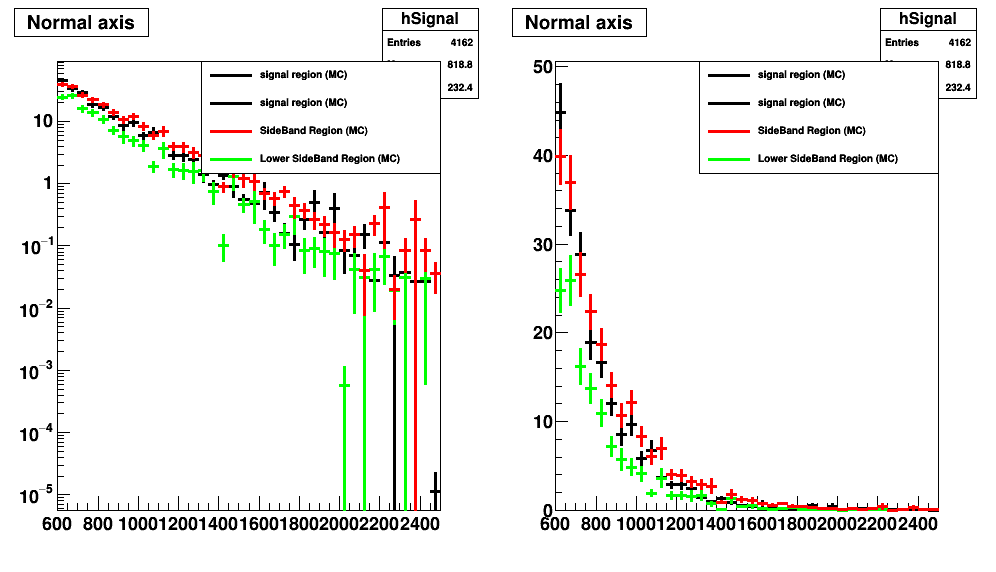

In [4]:
c1 = r.TCanvas("c1", "canvas", 1000, 600)
c1.SetLogy()
c1.Divide(2,1)
c1.cd(1)
r.gPad.SetLogy()
hSignal.SetTitle("Log axis")
hSignal.Draw()
hLowerSideBand.Draw("same")
hSideBand.Draw("same")
leg.Draw()
c1.cd(2)
hSignal.SetTitle("Normal axis")
hSignal.Draw()
hLowerSideBand.Draw("same")
hSideBand.Draw("same")
leg.Draw()

c1.Draw()

# Part-I

## Calculate alpha 

> by dividing W+jets MC in signal and side-band region


> Also fit the alpha

Alpha does not exists

****************************************
Minimizer is Linear
Chi2                      =      37.0316
NDf                       =           36
p0                        =      1.30476   +/-   0.0531981   
p1                        = -0.000527049   +/-   2.14954e-05 
Integral =  1568.11718741
Integral =  926.885944026


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


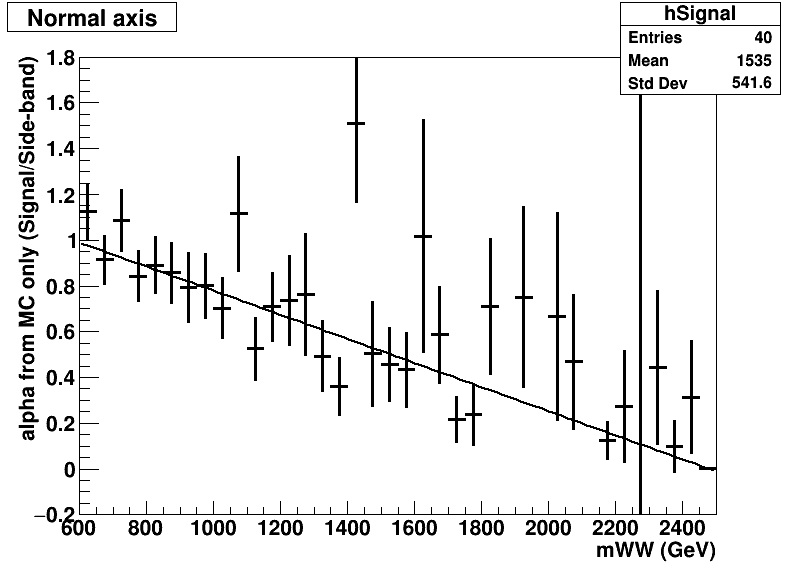

In [5]:
try: 
    Alpha.Delete();
except: 
    print "Alpha does not exists";
    
Alpha =  r.TH1D("Alpha","",38,600,2500)
Alpha = hSignal.Clone()
Alpha.Divide(hSideBand)
c1 = r.TCanvas("c1", "canvas", 800, 600)
Alpha.GetXaxis().SetTitle("mWW (GeV)")
Alpha.GetYaxis().SetTitle("alpha from MC only (Signal/Side-band)")
Alpha.SetMaximum(1.8)
Alpha.SetMinimum(-0.2)
Alpha.Draw()
f1 = r.TF1("f1","pol1",600,2500)
Alpha.Fit("f1")
c1.Draw()
print "Integral = ",Alpha.Integral("width")
print "Integral = ",f1.Integral(600,2500)
#for i in range(1,39):
#    print i,",",Alpha.GetBinContent(i),",",Alpha.GetBinLowEdge(i),",",Alpha.GetBinWidth(i)

## Rebin Alpha ( from 20 to 4 bins)

### Bin Center information

1. 600, 1075, 1550, 2025, 2500

1 	600 650 => 625.0 0.975354648862
2 	650 700 => 675.0 0.949002219593
3 	700 750 => 725.0 0.922649790324
4 	750 800 => 775.0 0.896297361055
5 	800 850 => 825.0 0.869944931786
6 	850 900 => 875.0 0.843592502516
7 	900 950 => 925.0 0.817240073247
8 	950 1000 => 975.0 0.790887643978
9 	1000 1050 => 1025.0 0.764535214709
10 	1050 1100 => 1075.0 0.73818278544
11 	1100 1150 => 1125.0 0.71183035617
12 	1150 1200 => 1175.0 0.685477926901
13 	1200 1250 => 1225.0 0.659125497632
14 	1250 1300 => 1275.0 0.632773068363
15 	1300 1350 => 1325.0 0.606420639094
16 	1350 1400 => 1375.0 0.580068209824
17 	1400 1450 => 1425.0 0.553715780555
18 	1450 1500 => 1475.0 0.527363351286
19 	1500 1550 => 1525.0 0.501010922017
20 	1550 1600 => 1575.0 0.474658492748
21 	1600 1650 => 1625.0 0.448306063478
22 	1650 1700 => 1675.0 0.421953634209
23 	1700 1750 => 1725.0 0.39560120494
24 	1750 1800 => 1775.0 0.369248775671
25 	1800 1850 => 1825.0 0.342896346402
26 	1850 1900 => 1875.0 0.316543917132
27 	1900 1950 => 1925

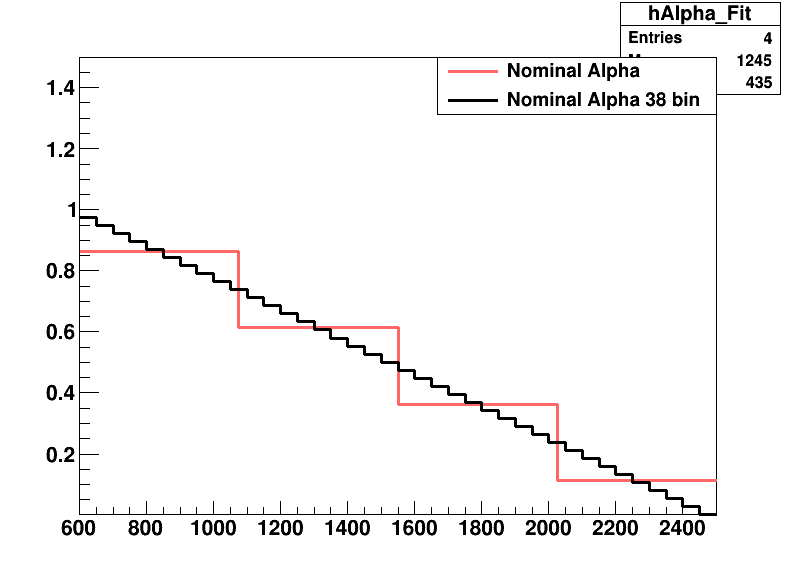

In [6]:
hAlpha_Fit = r.TH1F("hAlpha_Fit","",4,600,2500)
hAlpha_Fit.SetBinContent(1,f1.Eval(837.5));
hAlpha_Fit.SetBinContent(2,f1.Eval(1312.5)); 
hAlpha_Fit.SetBinContent(3,f1.Eval(1787.5)); 
hAlpha_Fit.SetBinContent(4,f1.Eval(2262.5)); 


hAlpha_Fit.SetMarkerColor(625)
hAlpha_Fit.SetLineColor(625)
#hAlpha_Fit.SetFillColor(625)
hAlpha_Fit.SetLineWidth(3)
hAlpha_Fit.SetMarkerSize(5)
hAlpha_Fit.SetMaximum(1.50)
hAlpha_Fit.SetMinimum(0.001)
leg = r.TLegend(0.55,0.9,.9,0.8)
leg.AddEntry(hAlpha_Fit,"Nominal Alpha")
hAlpha_Fit.Draw()


hAlpha_Fit_38bin = r.TH1F("hAlpha_Fit_38bin","",38,600,2500)
count = 1
import numpy as np
for i in np.arange(600,2500,50):
    print count,"\t",i,i+50,"=>",(i+i+50)/2.,f1.Eval((i+i+50)/2.)
    hAlpha_Fit_38bin.SetBinContent(count,f1.Eval((i+i+50)/2.));
    count+=1

hAlpha_Fit_38bin.SetMarkerColor(1)
hAlpha_Fit_38bin.SetLineColor(1)
hAlpha_Fit_38bin.SetLineWidth(3)
hAlpha_Fit_38bin.SetMarkerSize(5)
#hAlpha_Fit_38bin.SetMaximum(29.1)

#hAlpha_Fit_38bin.Rebin(25)

#hAlpha_Fit_38bin.Scale(1477.05600548/hAlpha_Fit_38bin.Integral("width"))

leg.AddEntry(hAlpha_Fit_38bin,"Nominal Alpha 38 bin")
hAlpha_Fit_38bin.Draw("same")    
    
leg.Draw()

c1.Update()
c1.Draw()

print "4 bin", hAlpha_Fit.GetBinContent(1)
print "4 bin", hAlpha_Fit.GetBinContent(2)
print "4 bin", hAlpha_Fit.GetBinContent(3)
print "4 bin", hAlpha_Fit.GetBinContent(4)
print "40 bin", hAlpha_Fit_38bin.GetBinContent(1)
print "40 bin", hAlpha_Fit_38bin.GetBinContent(2)
print "40 bin", hAlpha_Fit_38bin.GetBinContent(3)
print "40 bin", hAlpha_Fit_38bin.GetBinContent(4)

## Get alpha 1-sigma Up

## Get alpha 1-sigma Down

> Below to get 1-sigma down we need to multiply by 2 because earlier we add 1-sigma for getting 1-sigma up distribution for alpha

### Get Back to nominal alpha

# Get corrected W+jet in sideband region after fit to data

This histogram is saved in ExoVV fitter using create histogram method:

https://github.com/ram1123/EXOVVFitter/blob/master/g1_exo_doFit_class_new.py#L1795-L1796

But, this histogram was not taking the normalization so I have to scale it with the normalization. ***But, scaling the histogram also scaling the errors.***

263.936127424
bin 1 content =  43.6576919556
bin 2 content =  36.4438209534
bin 3 content =  30.4219512939
bin 4 content =  25.3951148987


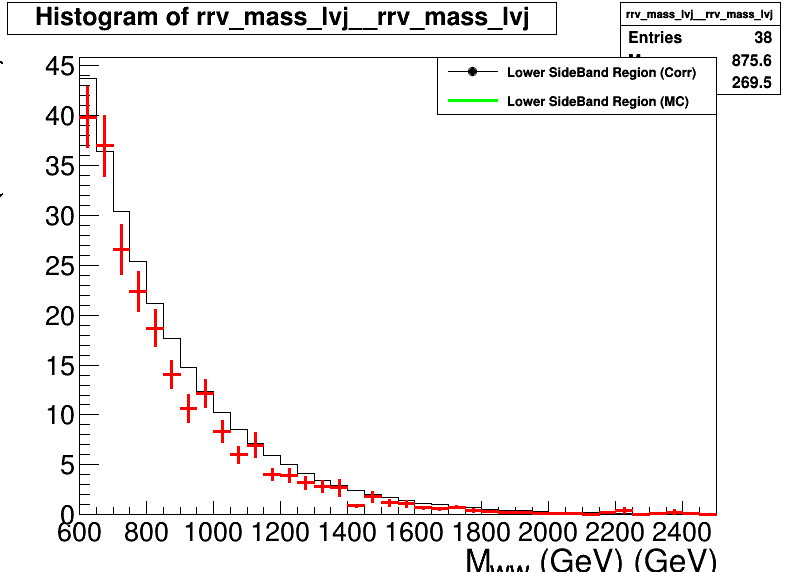

In [7]:
leg.Clear()
c1.Clear()
Wjet_file = r.TFile.Open("WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13_BothLSBUSB/wjetmodel_Ex__WJets0_xww__sb_lo_Exp_auto.root")
Wjet_hist = r.TH1F()
#Wjet_hist.Sumw2()
Wjet_hist = Wjet_file.Get("rrv_mass_lvj__rrv_mass_lvj")
#Wjet_hist = Wjet_file.Get("model_pdf_WJets0_xww_sb_lo_from_fitting_em_mlvj__rrv_mass_lvj")
Wjet_hist.Scale(264.295)
#Wjet_hist.Rebin(27)
print Wjet_hist.Integral()
#Wjet_hist.SetMaximum(150)
Wjet_hist.Draw("hist")
hSideBand.Draw("same")
#hLowerSideBand.Draw("same")
leg.AddEntry(Wjet_hist,"Lower SideBand Region (Corr)")
leg.AddEntry(hLowerSideBand,"Lower SideBand Region (MC)")
leg.Draw()
#c1.SetLogy()
c1.Draw()

print "bin 1 content = ",Wjet_hist.GetBinContent(1)
print "bin 2 content = ",Wjet_hist.GetBinContent(2)
print "bin 3 content = ",Wjet_hist.GetBinContent(3)
print "bin 4 content = ",Wjet_hist.GetBinContent(4)

# Multiplication by Alpha to get Signal Region W+jets obtained from data.

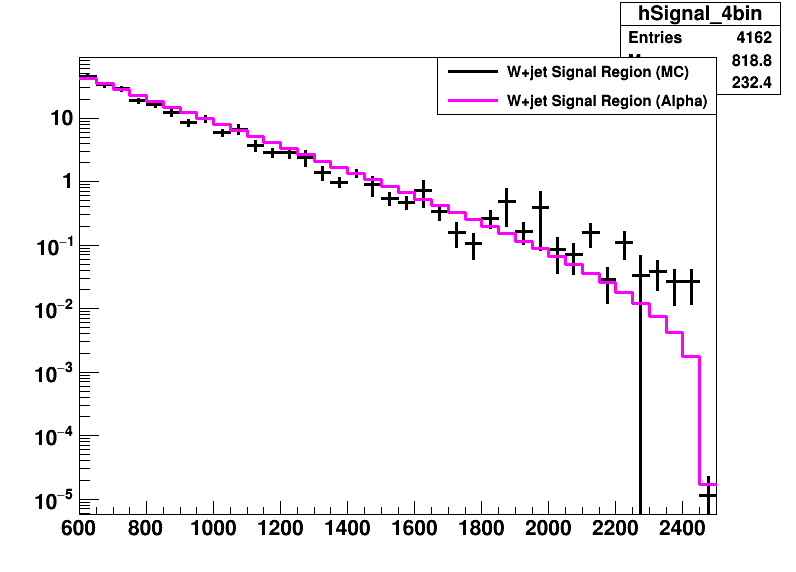

In [8]:
c1.Clear()
leg.Clear()
hModel_Sig = r.TH1F("hModel_Sig","",38,600,2500)
hModel_Sig.Sumw2()
hModel_Sig.SetMarkerColor(6)
hModel_Sig.SetLineColor(6)
hModel_Sig.SetLineWidth(3)

for i in range(1,39):
    hModel_Sig.SetBinContent(i,Wjet_hist.GetBinContent(i)*hAlpha_Fit_38bin.GetBinContent(i))
    
hSignal_4bin.Draw()

hModel_Sig.Draw("same")

leg.AddEntry(hSignal_4bin,"W+jet Signal Region (MC)")
leg.AddEntry(hModel_Sig,"W+jet Signal Region (Alpha)")

leg.Draw()
c1.SetLogy()
c1.Draw()

In [9]:
c1.Clear()
fin_Wjet_MC = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VJets.root")
fin_VV = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VV.root")
fin_TTbar = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_TTbar.root")
fin_STop = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_STop.root")
fin_Data = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_data_golden.root")

treeIn_Wjet_MC = fin_Wjet_MC.Get("otree")
treeIn_VV = fin_VV.Get("otree")
treeIn_TTbar = fin_TTbar.Get("otree")
treeIn_STop = fin_STop.Get("otree")
treeIn_Data = fin_Data.Get("otree")

In [10]:
hModel_Sig.SetMarkerColor(625)
hModel_Sig.SetLineColor(625)
hModel_Sig.SetFillColor(625)
hModel_Sig.SetLineWidth(3)
hModel_Sig.SetMarkerSize(5)

hWjets_MC = r.TH1D("hWjets_MC","",38,600,2500)
hWjets_MC.SetMarkerColor(607)
hWjets_MC.SetLineColor(607)
hWjets_MC.SetFillColor(607)
hWjets_MC.SetLineWidth(3)
hWjets_MC.SetMarkerSize(5)

hVV = r.TH1D("hVV","",38,600,2500)
hVV.SetMarkerColor(607)
hVV.SetLineColor(607)
hVV.SetFillColor(607)
hVV.SetLineWidth(3)
hVV.SetMarkerSize(5)

hTTbar = r.TH1D("hTTbar","",38,600,2500)
hTTbar.SetMarkerColor(592)
hTTbar.SetLineColor(592)
hTTbar.SetFillColor(592)
hTTbar.SetLineWidth(3)
hTTbar.SetMarkerSize(5)

hSTop = r.TH1D("hSTop","",38,600,2500)
hSTop.SetMarkerColor(854)
hSTop.SetLineColor(854)
hSTop.SetFillColor(854)
hSTop.SetLineWidth(3)
hSTop.SetMarkerSize(5)

hData = r.TH1D("hData","",38,600,2500)
hData.SetMarkerColor(1)
hData.SetLineColor(1)
#hData.SetFillColor(1)
hData.SetLineWidth(3)
hData.SetMarkerSize(5)

treeIn_Wjet_MC.Draw("mass_lvj_type0_PuppiAK8>>hWjets_MC",cutString_SideBand)
treeIn_VV.Draw("mass_lvj_type0_PuppiAK8>>hVV",cutString_SideBand)
treeIn_TTbar.Draw("mass_lvj_type0_PuppiAK8>>hTTbar",cutString_SideBand)
treeIn_STop.Draw("mass_lvj_type0_PuppiAK8>>hSTop",cutString_SideBand)

#cutString_SigData =  "((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so_corr>55) && (PuppiAK8_jet_mass_so_corr<65)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && (vbf_maxpt_jj_m>800) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>170))"

cutString_SigData =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((PuppiAK8_jet_mass_so_corr>65) && (PuppiAK8_jet_mass_so_corr<105)) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_SideBand =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so_corr>40)&&(PuppiAK8_jet_mass_so_corr<65)) || ((PuppiAK8_jet_mass_so_corr>105)&&(PuppiAK8_jet_mass_so_corr<150))) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_Lower_SideBand =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so_corr>40)&&(PuppiAK8_jet_mass_so_corr<65))) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"




treeIn_Data.Draw("mass_lvj_type0_PuppiAK8>>hData",cutString_SideBand)

343L

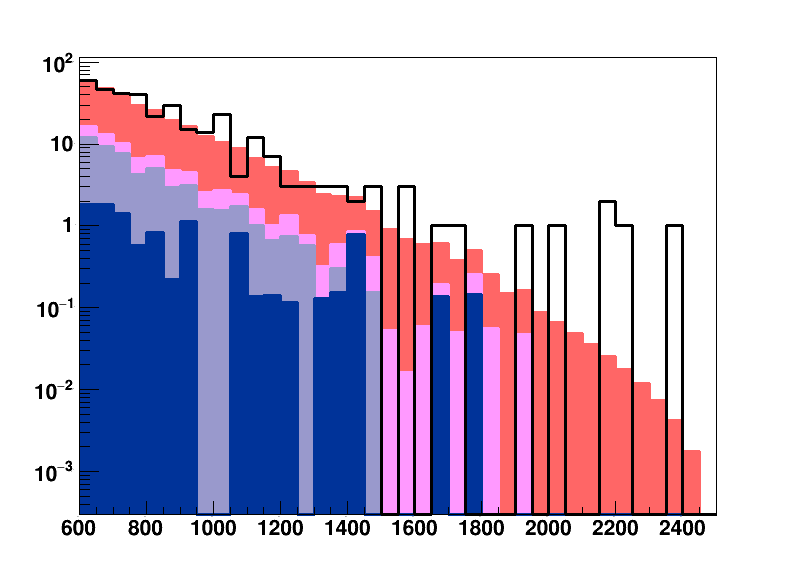

In [11]:
stack = r.THStack()

stack.Add(hSTop,"F")
stack.Add(hTTbar,"F")
stack.Add(hVV,"F")
stack.Add(hModel_Sig,"F")
#stack.Add(newHist,"F")

stack.SetMinimum(0.001)

stack.Draw("hist")
hData.Draw("same hist")

c1.Draw()

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 16 points have been skipped


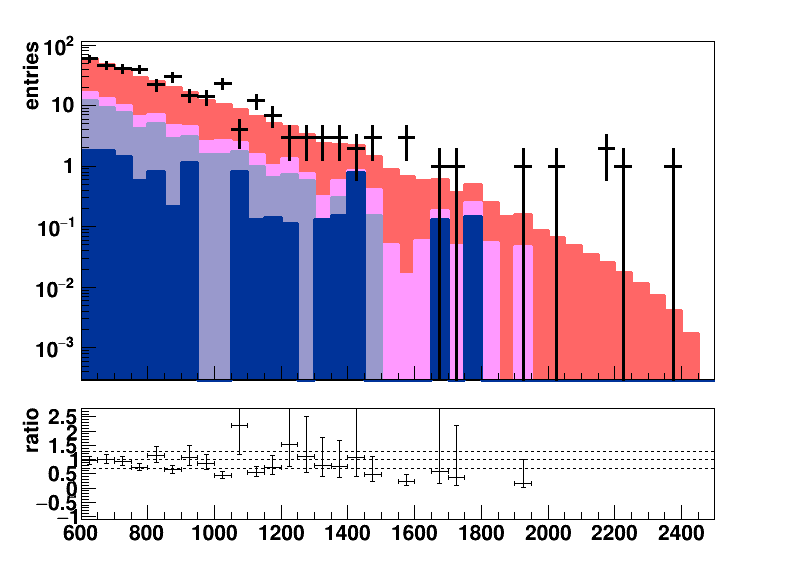

In [12]:
rp = r.TRatioPlot(stack, hData);
#c.SetTicks(0, 1);
rp.Draw();
rp.GetLowerRefYaxis().SetTitle("ratio");
rp.GetUpperRefYaxis().SetTitle("entries");
rp.GetLowerRefXaxis().SetTitle("M_{ww}");
rp.GetLowerRefGraph().SetMinimum(-1.1);
rp.GetLowerRefGraph().SetMaximum(2.8);
c1.Update();
c1.Draw()

In [13]:
print "Program is done..."

Program is done...
